BÎRLEA CAMELIA  

**Problem**: Eye Landmarks localization on WFLW dataset  
**Architecture**: ResNet-18  
**Dataset**: https://wywu.github.io/projects/LAB/WFLW.html  
**Request**: Select only 10 landmarks for all images  

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 

import pandas as pd

columns = [
    f"x{i//2}" if i % 2 == 0 else f"y{i//2}" for i in range(196)
] + ["x_min_rect", "y_min_rect", "x_max_rect", "y_max_rect",
     "pose", "expression", "illumination", "make_up", "occlusion", "blur",
     "image_name"]


file_path = "list_98pt_rect_attr_train.txt"
data = pd.read_csv(file_path, sep=r'\s+', names=columns)

print(data.head())

           x0          y0          x1          y1          x2          y2  \
0  309.307007  538.369019  317.857345  560.120847  322.271739  583.014395   
1  579.002991  167.764008  579.682070  179.841323  580.396685  191.916578   
2  249.128006  175.462997  249.330412  188.417601  249.393073  201.373615   
3  812.989014  627.505005  813.713626  633.254430  814.450604  639.002281   
4  507.287994  280.026001  507.360081  288.558285  507.747252  297.081106   

           x3          y3          x4          y4  ...  y_min_rect  \
0  319.583872  606.149851  314.765287  629.015727  ...         308   
1  581.180930  203.987499  582.094807  216.049139  ...          73   
2  249.558448  214.328097  250.530592  227.243593  ...         104   
3  815.212105  644.746929  816.041647  650.482018  ...         582   
4  508.773408  305.548694  510.611932  313.877793  ...         212   

   x_max_rect  y_max_rect  pose  expression  illumination  make_up  occlusion  \
0         696         870     0    

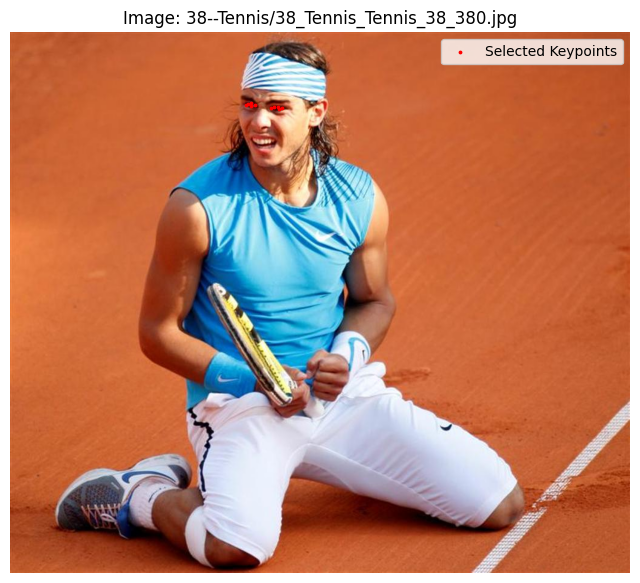

In [66]:
example = data.iloc[1704]
image_name = example["image_name"]
image_path = f"WFLW_images/{image_name}"

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

eyes_indices = list(range(60, 64)) + list(range(68, 72)) + [96, 97] # select eyes ONLY - the training will be made on eyes only!


keypoints = example.iloc[:196].values.reshape(-1, 2)  
selected_keypoints = keypoints[eyes_indices]  

selected_df = pd.DataFrame(selected_keypoints, columns=["x", "y"])

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.scatter(selected_df["x"], selected_df["y"], c='red', s=3, label="Selected Keypoints")
plt.title(f"Image: {image_name}")
plt.axis("off")
plt.legend()
plt.show()